#### Load the dataset 

In [26]:
import pandas as pd

df = pd.read_csv('./data/laptops.csv')

In [27]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [28]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [29]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [30]:
print(df.columns)

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')


In [31]:
df = df[['ram', 'storage', 'screen', 'final_price']]

In [32]:
### Exploratory Data Analysis

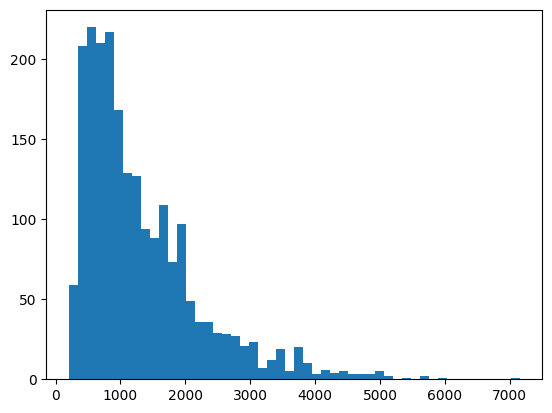

In [33]:
import matplotlib.pyplot as plt
plt.hist(df['final_price'], bins=50)
plt.show()

#### Question 1: Column with missing values

In [34]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

##### Question 2: Median of the 'ram' variable

In [36]:
ram_median = df['ram'].median()
print(ram_median)

16.0


#### Split the Dataset

In [41]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42) 

#### Question 3: Handling Missing Values

##### Fill missing values with 0

In [45]:
df_train_filled_0 = df_train_filled = df_train.fillna(0)

##### Fill missing values with the mean of the training set:

In [46]:
mean_value = df_train.mean()
df_train_filled_mean = df_train_filled = df_train.fillna(mean_value)

###### Prepare your features (X) and target (y)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_train = df_train_filled[['ram', 'storage', 'screen']].values
y_train = df_train_filled['final_price'].values

X_val = df_val[['ram', 'storage', 'screen']].values
y_val = df_val['final_price'].values

In [55]:
##### Train the model:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

##### Question 4: Regularized Linear Regression

In [56]:
from sklearn.linear_model import Ridge

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
best_rmse = float('inf')
best_r = None

for r in r_values:
    model_ridge = Ridge(alpha=r)
    model_ridge.fit(X_train, y_train)

    # Make predictions and calculate RMSE
    y_pred_ridge = model_ridge.predict(X_val)
    rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred_ridge))

    print(f'r={r}, RMSE={rmse_ridge:.2f}')

    if rmse_ridge < best_rmse:
        best_rmse = rmse_ridge
        best_r = r

r=0, RMSE=617.00
r=0.01, RMSE=617.00
r=0.1, RMSE=617.00
r=1, RMSE=617.00
r=5, RMSE=617.00
r=10, RMSE=617.00
r=100, RMSE=617.01


#### Question 5: Impact of Seed on RMSE

In [53]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)

    df_train_filled_0 = df_train.fillna(0)
    df_val_filled_0 = df_val.fillna(0)

    X_train = df_train_filled_0[['ram', 'storage', 'screen']].values
    y_train = df_train_filled_0['final_price'].values

    X_val = df_val_filled_0[['ram', 'storage', 'screen']].values
    y_val = df_val_filled_0['final_price'].values

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    rmse_scores.append(rmse)

std_rmse = np.std(rmse_scores)
print(f'Standard deviation of RMSE: {std_rmse:.3f}')

Standard deviation of RMSE: 36.290


##### Question 6: Final Model

In [54]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=9)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=9)

df_train_combined = pd.concat([df_train, df_val]).fillna(0)

X_train_combined = df_train_combined[['ram', 'storage', 'screen']].values
y_train_combined = df_train_combined['final_price'].values

X_test = df_test[['ram', 'storage', 'screen']].values
y_test = df_test['final_price'].values

# Train the model with r=0.001
model_ridge = Ridge(alpha=0.001)
model_ridge.fit(X_train_combined, y_train_combined)

# Evaluate on the test set
y_pred_test = model_ridge.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE on test dataset: {rmse_test:.2f}')

RMSE on test dataset: 535.08
